In [1]:
# Do relevant imports
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [2]:
# Read in and grayscale the image
image = mpimg.imread('../images/exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

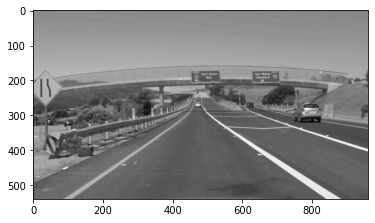

In [3]:
plt.imshow(gray, cmap="gray")
plt.show()

In [4]:
# define kernal size and apply Gaussian smoothing
ker_size = 5
blur_gray = cv2.GaussianBlur(gray,(ker_size, ker_size),0)


In [5]:
# define parameters for Canny smoothing
l_threasold = 50
h_threasold = 150

masked_edges = cv2.Canny(blur_gray, l_threasold, h_threasold)

In [6]:
# define the hough transform parameters
# make a blank the same size as our image to draw on
rho =1
theta = np.pi / 180
threshold = 1
min_line_length = 10
max_line_gap = 1

line_image = np.copy(image)*0


In [9]:
# Run hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [11]:
# iterate over the output "lines" and draw lines on the blank
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

In [13]:
color_edges = np.dstack((masked_edges,masked_edges,masked_edges))

In [15]:
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1,0)

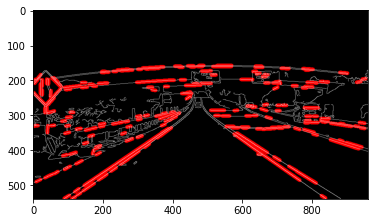

In [17]:
plt.imshow(combo)
plt.show()